## 2nd step arrange data to get more accuracy

In [2]:
import pandas as pd
import json

In [2]:
# Read the data from the CSV file
# dt_arr = data_arrange
dt_arr = pd.read_csv('../Data1/CleanedSt.csv')

In [3]:
x = dt_arr['tweet']
y = dt_arr['relation']

In [4]:
# dt_st_arr = data short text arrange
# pre_arr_dt_st = pre arrange data short text
selected_columns = ['relation', 'tweet']
dt_st_arr = dt_arr[selected_columns]
dt_st_arr.to_csv('../Data1/pre_arr_dt_st.csv', index=False) 

# Command dulu

In [5]:
# multiclass_st = pd.read_csv('../Data1/pre_arr_dt_st.csv')

In [6]:
# multiclass_st = pd.get_dummies(multiclass_st, columns=['relation'], prefix='', prefix_sep='')

In [7]:
# print(multiclass_st.columns)

Index(['tweet', '0', '1', '2'], dtype='object')


In [8]:
# multiclass_st = multiclass_st.groupby('tweet').max().reset_index()

In [10]:
# multiclass_st.to_csv('../Data1/ArrangedSt.csv', index=False)  

# Multiclass data to Multilabel data

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from nltk.tokenize import word_tokenize
import gensim.downloader
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irfanizam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Step 1: Load your data from CSV
file_path = '../Data1/pre_arr_dt_st.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

In [3]:
# Step 2: Create MultiLabelBinarizer and fit on the 'relation' column
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df['relation'].apply(lambda x: [x]))

In [4]:
# Step 3: Create a new DataFrame with one-hot encoded labels
df_encoded = pd.concat([df['tweet'], pd.DataFrame(labels, columns=mlb.classes_)], axis=1)

In [5]:
# Step 4: Split the data into train and test sets
train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [6]:
# Save the test set data to a separate CSV file
test_data.to_csv('../Data1/TestSt.csv', index=False)
train_data.to_csv('../Data1/TrainSt.csv', index=False)

In [7]:
# Step 5: Define features and labels for training and testing
X_train = train_data['tweet']
y_train = np.argmax(train_data.drop('tweet', axis=1).values, axis=1)
X_test = test_data['tweet']
y_test = np.argmax(test_data.drop('tweet', axis=1).values, axis=1)

In [8]:
# Step 6: Display the transformed data
print("Transformed Training Data:")
print(train_data)

Transformed Training Data:
                                                   tweet  0  1  2
9172   north northbound after west rd accident status...  0  1  0
26090  updated crash manatee highway south exit highw...  0  1  0
29041   crash eb highway mp tooele est clearance time am  0  1  0
31509  cleared traffic congestion alachua highway sou...  0  0  1
23936  brdg work highway dirs btwn east exit garden s...  0  1  0
...                                                  ... .. .. ..
6265   closure richardson highway milepost milepost a...  0  1  0
11284  accident wb highway chesapeake travel lane clo...  0  1  0
38158  dir lee worldipday we must always ensure ip sy...  1  0  0
860       wanted attempted rape female near southern ave  1  0  0
15795  usa football ceo football owes countless level...  1  0  0

[33456 rows x 4 columns]


In [9]:
# Step 7

X_train = train_data['tweet']

# Tokenize the text data
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in X_train]

# Define and train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
word2vec_model.save("word2vec_model.model")

# Access word vectors
vector = word2vec_model.wv['word']

# Find similar words
similar_words = word2vec_model.wv.most_similar('word', topn=5)

# Print the results
print(f"Vector for 'word': {vector}")
print(f"Similar words to 'word': {similar_words}")


Vector for 'word': [-1.81619540e-01  3.16452570e-02  1.06284171e-02 -1.14504406e-02
  1.10764258e-01 -3.09409440e-01 -4.87023219e-03  4.49693739e-01
 -1.19002260e-01 -1.63216010e-01 -1.89389288e-01 -1.52347088e-01
 -1.92559008e-02 -9.64588579e-03  6.69868896e-04 -1.81933731e-01
  1.12296596e-01 -3.93843651e-01 -5.09957783e-02 -2.92853624e-01
  4.66371812e-02  1.50088936e-01 -1.18587546e-01 -1.73047900e-01
  2.61917505e-02 -5.61884083e-02 -3.08064193e-01 -1.90805689e-01
 -1.75982729e-01 -3.51767498e-03  2.67616630e-01  1.21165112e-01
  1.40634730e-01 -1.11425787e-01 -1.07199878e-01  1.59893304e-01
 -4.36117984e-02 -1.03961103e-01  3.52316052e-02 -5.86325943e-01
 -1.36675008e-04 -8.67454484e-02  4.56595384e-02 -9.56385657e-02
  1.95092320e-01 -1.01382710e-01 -1.53782576e-01  1.83370292e-01
  1.99635759e-01  1.01740144e-01  1.36959568e-01  4.86813486e-03
  5.17435558e-02 -4.57945615e-02 -1.32755458e-01  9.09889862e-02
  1.45642310e-01  1.33197159e-01 -1.05928384e-01  7.50951543e-02
 -1.75

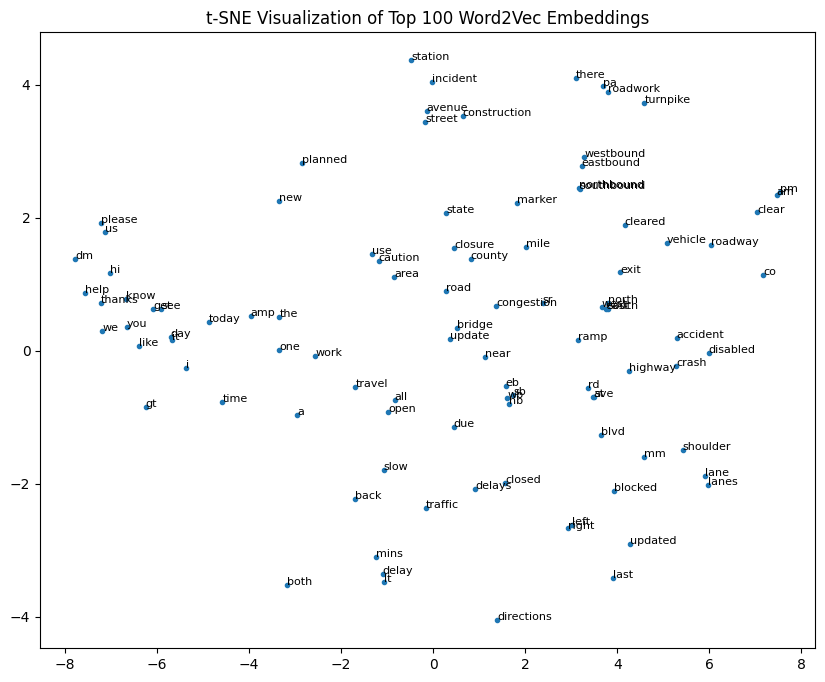

In [9]:
import gensim
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your Word2Vec model
# Replace 'word2vec_model.model' with the actual path to your Word2Vec model file
word2vec_model = gensim.models.Word2Vec.load('word2vec_model.model')

# Get the vocabulary and corresponding vectors
words = list(word2vec_model.wv.key_to_index.keys())
vectors = [word2vec_model.wv[word] for word in words]

# Select the top 100 words and vectors
top_words = 100
words = words[:top_words]
vectors = vectors[:top_words]

# Convert the list of vectors to a 2D numpy array
vectors = np.array(vectors)

# Apply t-SNE to reduce the dimensionality
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='.')

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

plt.title('t-SNE Visualization of Top 100 Word2Vec Embeddings')
plt.show()


In [10]:
# Function to calculate the average Word2Vec vector for a tweet
def average_word_vectors(words, model):
    feature_vector = np.zeros((model.vector_size,), dtype="float64")
    nwords = 0
    for word in words:
        if word in model.wv.key_to_index:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv.get_vector(word))
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [11]:
# Tokenize the tweets
tokenized_tweet = [word_tokenize(tweet.lower()) for tweet in X_train]

In [12]:
# Create a feature matrix for training
train_vectors = [average_word_vectors(tweet, word2vec_model) for tweet in tokenized_tweet]
X_train_word2vec = np.vstack(train_vectors)

In [13]:

# Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_word2vec, y_train)

# Step 8: Evaluate the model on the test set
# Tokenize the tweets for the test set
tokenized_test_summary = [word_tokenize(summary.lower()) for summary in X_test]

# Create a feature matrix for testing
test_vectors = [average_word_vectors(summary, word2vec_model) for summary in tokenized_test_summary]
X_test_word2vec = np.vstack(test_vectors)

# Predict the labels for the test set
y_pred_test = svm_model.predict(X_test_word2vec)

# Step 9.1: Accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Round Test Accuracy: {accuracy_test}")

Round Test Accuracy: 0.9006575014943216


In [14]:
# Step 9.2: Classification Report
classification_rep_test = classification_report(y_test, y_pred_test)
print("Test Classification Report:\n", classification_rep_test)

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4226
           1       0.82      0.98      0.89      3476
           2       0.00      0.00      0.00       663

    accuracy                           0.90      8365
   macro avg       0.60      0.65      0.62      8365
weighted avg       0.84      0.90      0.87      8365



c:\Users\irfanizam\workspace\FYP-Example\accident-news-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irfanizam\workspace\FYP-Example\accident-news-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\irfanizam\workspace\FYP-Example\accident-news-classification\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

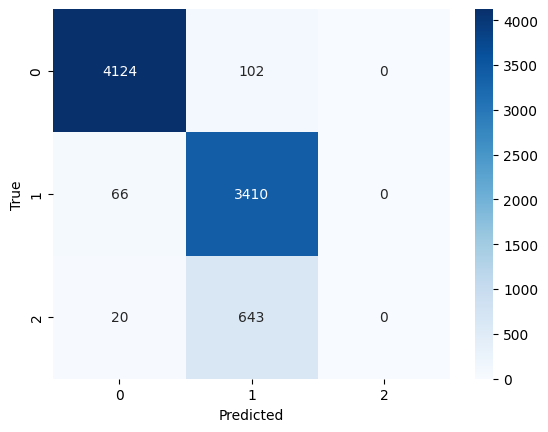

In [15]:
# Step 9.3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

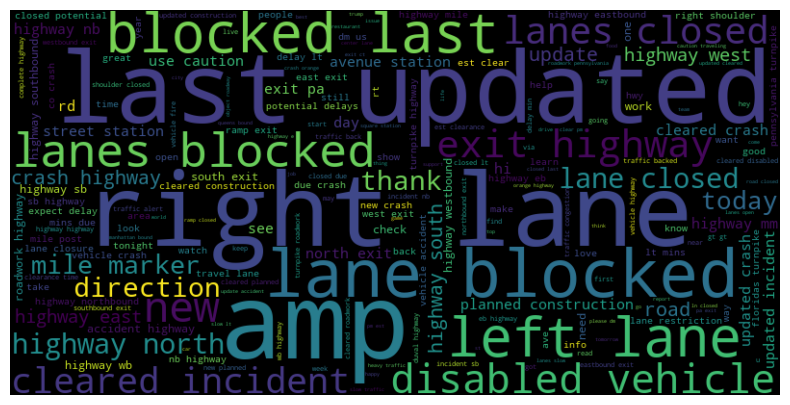

In [16]:
from wordcloud import WordCloud

# Combine all tweets into a single string
all_tweets_text = ' '.join(df['tweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

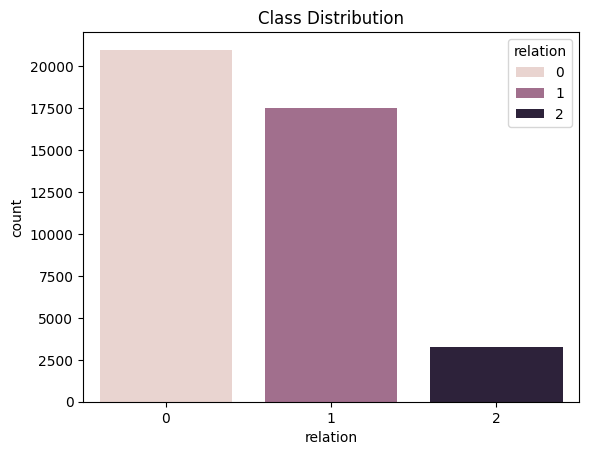

In [17]:
sns.countplot(x='relation', data=df, hue='relation')
plt.title('Class Distribution')
plt.show()

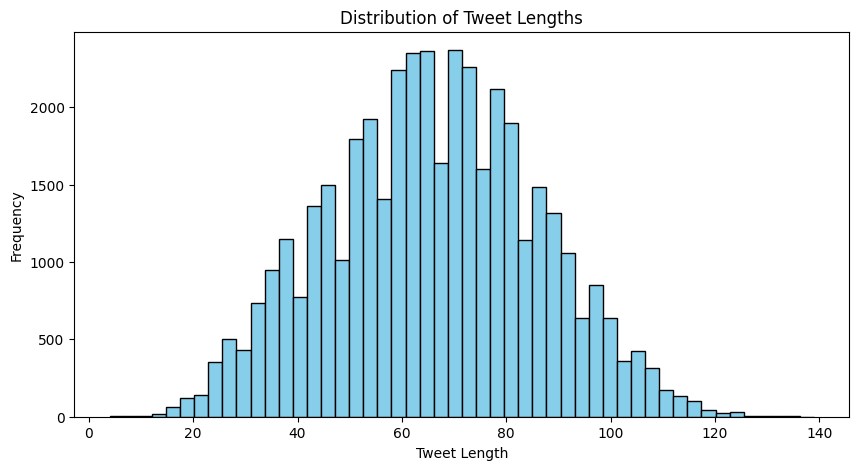

In [18]:
# Calculate tweet lengths
tweet_lengths = df['tweet'].apply(len)

# Plot a histogram
plt.figure(figsize=(10, 5))
plt.hist(tweet_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Step 10: Save the trained model
model_filename = 'st_svm_model.h5'
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

In [20]:
import joblib
# Load the saved word2vec vectorizer
loaded_vectorizer = joblib.load('word2vec_model.model')
# Load the saved SVM classifier
svm_classifier = joblib.load('st_svm_model.h5')

In [21]:
def class_det(tweet, model, classifier):
    tokenized_tweet = [word.lower() for word in tweet.split()]
    vectorized_input_data = [average_word_vectors(tokenized_tweet, model)]
    predictions = classifier.predict(vectorized_input_data)
    print(predictions)
    return predictions

In [22]:
queries = [
    'rt the entrance ramp dalrymple drive highway west open congestion remains minimal','well said amp i grateful strong efforts expand amp grow american agriculture','cleared traffic congestion manatee highway south beyond exit st east exit highway last updated','nb sb lincoln rd st ave roadway closed due structure fire allegan county randy weits','in weekly address president obama discusses progress made combating climate left','cleared accident eb highway high rise bridge chesapeake'
]


for query in queries:
    print(query, class_det(query, loaded_vectorizer, svm_classifier))
    print()

[1]
rt the entrance ramp dalrymple drive highway west open congestion remains minimal [1]

[0]
well said amp i grateful strong efforts expand amp grow american agriculture [0]

[1]
cleared traffic congestion manatee highway south beyond exit st east exit highway last updated [1]

[1]
nb sb lincoln rd st ave roadway closed due structure fire allegan county randy weits [1]

[0]
in weekly address president obama discusses progress made combating climate left [0]

[1]
cleared accident eb highway high rise bridge chesapeake [1]

